<a href="https://colab.research.google.com/github/Jeong-Bin/DA-PROJECT/blob/main/PROJECT_7%20%EC%BA%90%EA%B8%80_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/딥러닝 공부/london_merged.csv', parse_dates = ['timestamp'])
df.head()                                                                    # 시간 데이터라는 것을 명시하는 옵션

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [37]:
# 데이터의 타입과 구조
print('데이터 수 : ', df.shape)
print('데이터 타입 : ', df.dtypes)
print('데이터 컬럼 : ', df.columns)

데이터 수 :  (17414, 10)
데이터 타입 :  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터 컬럼 :  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [38]:
# 결측치 수 확인
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

# **EDA**


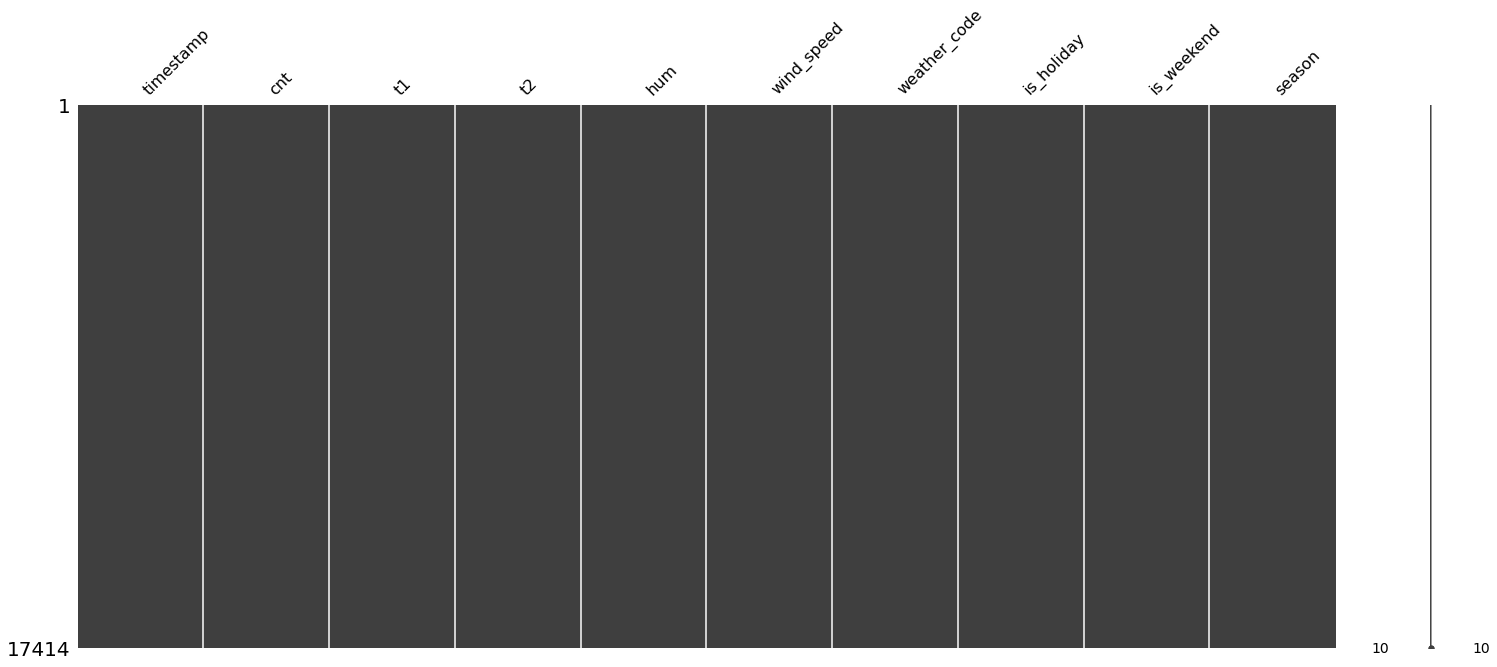

In [39]:
# 결측치 시각화(있으면 그 부분이 흰색으로 나옴)
msno.matrix(df)
plt.show()

In [40]:
# timestamp로부터 year,month,day,hour만 추출해서 새로운 컬럼으로 만듦
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [41]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


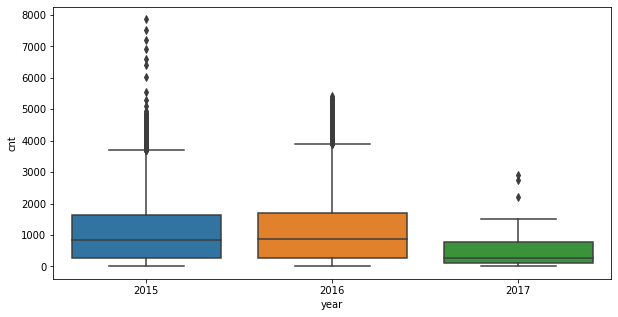

In [42]:
a, b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['year'], df['cnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


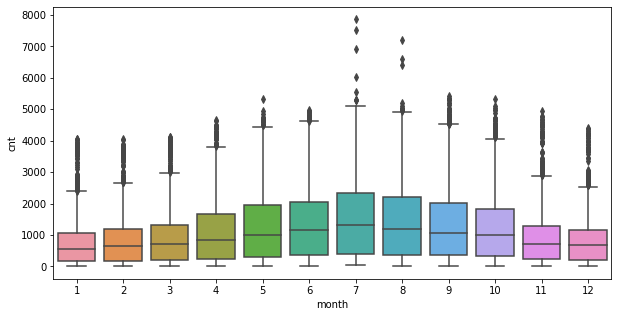

In [43]:
a, b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['month'], df['cnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


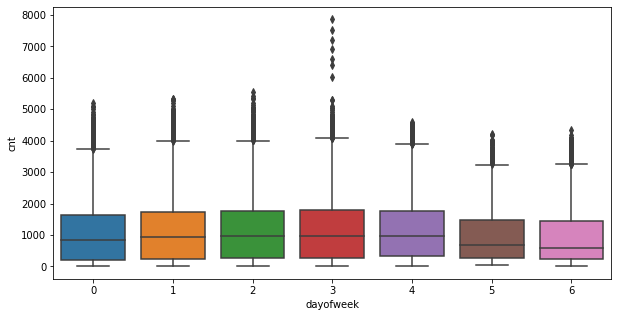

In [44]:
a, b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['dayofweek'], df['cnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


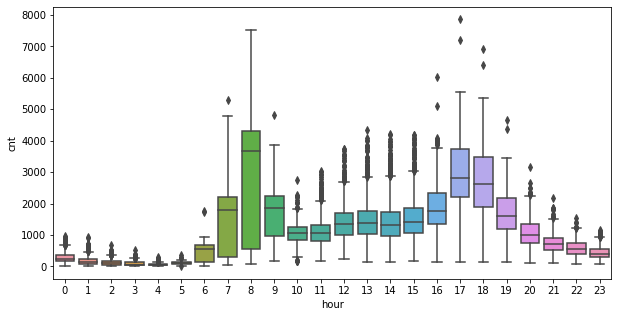

In [45]:
a, b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['hour'], df['cnt'])

In [46]:
# 그래프 함수 만들기
def plot_bar(data, feature):
  fig = plt.figure(figsize=(12,3))
  sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')

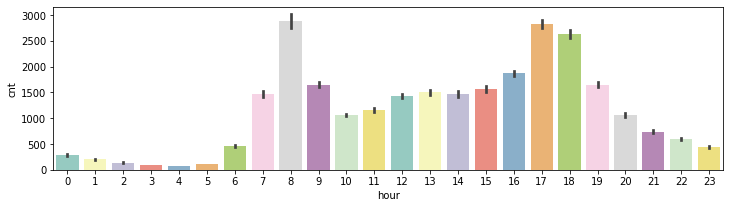

In [47]:
plot_bar(df, 'hour')

# **전처리**

In [48]:
# 이상치 제거 함수

def is_outlier(s):
  lower_limit = s.mean() - (s.std()*3)
  upper_limit = s.mean() + (s.std()*3)
  return ~s.between(lower_limit, upper_limit)

In [49]:
# 시간대별 이용객수에 위 함수를 적용
df_out = df[~df.groupby('hour')['cnt'].apply(is_outlier)]

print('이상치 제거 전 : ', df.shape)
print('이상치 제거 후 : ', df_out.shape)

이상치 제거 전 :  (17414, 14)
이상치 제거 후 :  (17265, 14)


In [50]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [51]:
# int형이지만 실제로는 범주형인 데이터를 category형으로 변경

df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [52]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [53]:
# 더미 처리(0 또는 1의 이진수로 변경)
df_out = pd.get_dummies(df_out, columns=['weather_code','season','year','month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,season_0.0,season_1.0,season_2.0,season_3.0,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df_out.shape

(17265, 59)

In [55]:
# cnt를 종속변수로, timestamp와 cnt를 제외한 나머지를 독립변수로 지정
df_y = df_out['cnt']  
df_x = df_out.drop(['timestamp', 'cnt'], axis=1) # axis=1이면 열 기준으로 drop 

df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,season_0.0,season_1.0,season_2.0,season_3.0,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [57]:
# train, test 분리 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=50, test_size=0.3, shuffle=False)
# random_state : 이걸 임의의 수로 지정하면 항상 같은 값으로 나옴(강의와 같은 값이 나오게 하기 위해)
# shuffle : 데이터를 섞는 것. 우리 데이터는 시계열이라 섞으면 안 되기 때문에 False

In [58]:
print('x_tain의 구조 : ', x_train.shape)
print('y_tain의 구조 : ', y_train.shape)

print('x_test의 구조 : ', x_test.shape)
print('y_test의 구조 : ', y_test.shape)

x_tain의 구조 :  (12085, 57)
y_tain의 구조 :  (12085,)
x_test의 구조 :  (5180, 57)
y_test의 구조 :  (5180,)


# **딥러닝**

In [59]:
!pip uninstall -y tensorflow keras tf-nightly keras-nightly

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0


In [60]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp37-cp37m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autokeras 1.0.16 requires tensorflow<=2.5.0,>=2.3.0, but you have tensorflow 2.6.0 which is incompatible.


In [61]:
from keras.utils.np_utils import to_categorical 
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model = Sequential()

# 층을 쌓는 방식 사용
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))
# activation : 활성화 함수(렐루, 탄젠트, 시그모이드, 리니어 등이 있음)
# input_dim : 독립변수의 수
# 마지막엔 결과가 1개가 나와야 하니 units은 1, 활성함수는 linear

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 160)               9280      
_________________________________________________________________
dense_5 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='min')
# patience=5 : val_loss가 증가하는 횟수가 5번이 되면 멈춰라(과적합 예방)
     # loss는 계속 줄어드는 방향으로 학습 할테지만, val_loss는 줄어들다가 다시 증가할 수도 있다.(-> 과적합 시점)

history = model.fit(x_train, y_train, epochs=30, batch_size=1, validation_split=0.2, callbacks=[early_stopping])
# epochs : 최대 반복 횟수
# batch_size : 한번에 학습할 데이터의 수
  # epochs를 너무 크게하면 오버피팅이 발생할 수 있으며, batch_size를 너무 작게하면 학습시간이 오래걸릴 수 있다. 
# validation_split : 훈련 중 검증용 데이터 분리(과적합 예방)

Epoch 1/30
9668/9668 [==============================] - 31s 3ms/step - loss: 549.9869 - mae: 549.9869 - val_loss: 387.5000 - val_mae: 387.5000
Epoch 2/30
9668/9668 [==============================] - 28s 3ms/step - loss: 338.9337 - mae: 338.9337 - val_loss: 276.5121 - val_mae: 276.5121
Epoch 3/30
9668/9668 [==============================] - 29s 3ms/step - loss: 259.8726 - mae: 259.8726 - val_loss: 225.1454 - val_mae: 225.1454
Epoch 4/30
9668/9668 [==============================] - 27s 3ms/step - loss: 222.0693 - mae: 222.0693 - val_loss: 230.3013 - val_mae: 230.3013
Epoch 5/30
9668/9668 [==============================] - 29s 3ms/step - loss: 204.0055 - mae: 204.0055 - val_loss: 201.1406 - val_mae: 201.1406
Epoch 6/30
9668/9668 [==============================] - 28s 3ms/step - loss: 188.1739 - mae: 188.1739 - val_loss: 171.3438 - val_mae: 171.3438
Epoch 7/30
9668/9668 [==============================] - 29s 3ms/step - loss: 176.7036 - mae: 176.7036 - val_loss: 175.2894 - val_mae: 175.2894

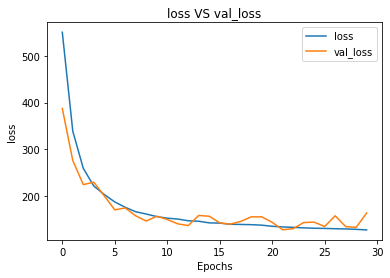

In [65]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.title('loss VS val_loss')
plt.show()

# 그래프에선 Epochs가 0부터 시작하므로 1칸씩 당겨서 봐야함!

In [66]:
# 위 딥러닝 모형을 가지고 예측
y_predict = model.predict(x_test)

In [67]:
# rmse로 예측값과 실제값 비교
from sklearn.metrics import mean_squared_error # mse 임포트

def RMSE(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict)) # sqrt : 루트
print('RMSE', RMSE(y_test, y_predict))

# RMSE가 낮을 수록 좋음

RMSE 319.67059605797


# **머신러닝 - 의사결정나무**

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=16)
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)
print('RMSE', RMSE(y_test, rf_result))

RMSE 303.6417775662534


# **머신러닝 - XGBoost**

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=16)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)
print('RMSE', RMSE(y_test, xgb_result))

[04:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE 485.08509052866196


# **머신러닝 - LightGBM**

In [70]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(x_train, y_train)
lgb_result = lgb.predict(x_test)
print('RMSE', RMSE(y_test, lgb_result))

RMSE 323.2746495922864


In [71]:
dnn = pd.DataFrame(y_predict)
rf = pd.DataFrame(rf_result)
xgb = pd.DataFrame(xgb_result)
lgb = pd.DataFrame(lgb_result)

# 실제값을 compare라는 변수에 넣고 비교하기
compare = pd.DataFrame(y_test).reset_index(drop=True)
# 컬럼&값 추가
compare['dnn'] = dnn
compare['rf'] = rf
compare['xgb'] = xgb
compare['lgb'] = lgb
compare.head()

,cnt,dnn,rf,xgb,lgb
0,1885,1824.896606,1700.24,1049.221069,1830.345197
1,2175,2080.719482,1803.82,1302.989868,2133.296789
2,2485,2242.802979,2191.37,1797.603760,2590.899050
3,2882,2224.640137,2206.67,1998.709351,2613.783086
4,2965,2282.606689,2276.35,2026.297852,2306.341169


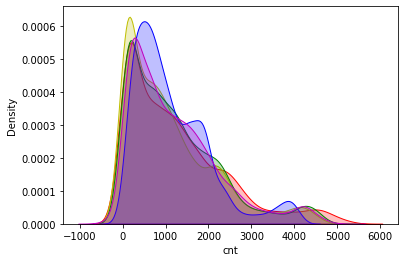

In [72]:
# 커널 밀도함수 그레프를 통해 분포 비교
sns.kdeplot(compare['cnt'], shade=True, color='r')
sns.kdeplot(compare['dnn'], shade=True, color='y')
sns.kdeplot(compare['rf'], shade=True, color='g')
sns.kdeplot(compare['xgb'], shade=True, color='b')
sns.kdeplot(compare['lgb'], shade=True, color ='m')